**Objective:** Train an ANN to perform sentiment analysis on movie reviews and classify them as positive or negative.

**Task Breakdown:**


1.   Data preparation (20 minutes)
2.   Feature extraction (20 minutes)
3.   ANN model creation (30 minutes)
4.   Model training (30 minutes)
5.   Model evaluation (10 minutes)
6.   Wrap up and reflection (10 minutes)

In [ ]:
!gdown 1l4Ruitn5kQNM5g5KLPCphk00ZtOKpFd6

Downloading...
From: https://drive.google.com/uc?id=1l4Ruitn5kQNM5g5KLPCphk00ZtOKpFd6
To: /content/IMDB Dataset.csv
100% 66.2M/66.2M [00:00<00:00, 84.2MB/s]


In [ ]:
import os
import pandas as pd
import numpy as np

**Data preparation (20 minutes):**

Load the IMDb dataset.
Perform basic preprocessing such as tokenisation, stopword removal, and stemming/lemmatisation.


In [ ]:
import tensorflow as tf
from tensorflow import keras

# import the IMDB dataset from csv file
imdb = pd.read_csv('/content/IMDB Dataset.csv')

# check the first 5 rows of the dataset
imdb.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
# print the first review
print(imdb['review'][0])

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fac

In [ ]:
# remove the html tags
import re
def remove_tags(text):
    TAG_RE = re.compile(r'<[^>]+>')
    return TAG_RE.sub('', text)

# remove the html tags from the reviews
imdb['review'] = imdb['review'].apply(lambda x: remove_tags(x))

# print the first review
print(imdb['review'][0])

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.I would say the main appeal of the show is due to the fact that it goes where other shows wou

In [ ]:
# remove the punctuation
import string
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

# remove the punctuation from the reviews
imdb['review'] = imdb['review'].apply(lambda x: remove_punctuation(x))

# print the first review
print(imdb['review'][0])

One of the other reviewers has mentioned that after watching just 1 Oz episode youll be hooked They are right as this is exactly what happened with meThe first thing that struck me about Oz was its brutality and unflinching scenes of violence which set in right from the word GO Trust me this is not a show for the faint hearted or timid This show pulls no punches with regards to drugs sex or violence Its is hardcore in the classic use of the wordIt is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary It focuses mainly on Emerald City an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda Em City is home to manyAryans Muslims gangstas Latinos Christians Italians Irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awayI would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare Forget pretty picture

In [ ]:
# remove the numbers
def remove_numbers(text):
    result = ''.join([i for i in text if not i.isdigit()])
    return result

# remove the numbers from the reviews
imdb['review'] = imdb['review'].apply(lambda x: remove_numbers(x))

# print the first review
print(imdb['review'][0])


One of the other reviewers has mentioned that after watching just  Oz episode youll be hooked They are right as this is exactly what happened with meThe first thing that struck me about Oz was its brutality and unflinching scenes of violence which set in right from the word GO Trust me this is not a show for the faint hearted or timid This show pulls no punches with regards to drugs sex or violence Its is hardcore in the classic use of the wordIt is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary It focuses mainly on Emerald City an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda Em City is home to manyAryans Muslims gangstas Latinos Christians Italians Irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awayI would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare Forget pretty pictures

In [ ]:
# convert to lower case
### INSERT YOUR CODE HERE ###
imdb['review'] = imdb['review'].str.lower()


# print the first review
print(imdb['review'][0])

one of the other reviewers has mentioned that after watching just  oz episode youll be hooked they are right as this is exactly what happened with methe first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the wordit is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awayi would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare forget pretty pictures

In [ ]:
# tokenize the reviews
### INSERT YOUR CODE HERE ###
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

imdb['review'] = imdb['review'].apply(lambda x: word_tokenize(x))



# print the first review as tokens
print(imdb['review'][0])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['one', 'of', 'the', 'other', 'reviewers', 'has', 'mentioned', 'that', 'after', 'watching', 'just', 'oz', 'episode', 'youll', 'be', 'hooked', 'they', 'are', 'right', 'as', 'this', 'is', 'exactly', 'what', 'happened', 'with', 'methe', 'first', 'thing', 'that', 'struck', 'me', 'about', 'oz', 'was', 'its', 'brutality', 'and', 'unflinching', 'scenes', 'of', 'violence', 'which', 'set', 'in', 'right', 'from', 'the', 'word', 'go', 'trust', 'me', 'this', 'is', 'not', 'a', 'show', 'for', 'the', 'faint', 'hearted', 'or', 'timid', 'this', 'show', 'pulls', 'no', 'punches', 'with', 'regards', 'to', 'drugs', 'sex', 'or', 'violence', 'its', 'is', 'hardcore', 'in', 'the', 'classic', 'use', 'of', 'the', 'wordit', 'is', 'called', 'oz', 'as', 'that', 'is', 'the', 'nickname', 'given', 'to', 'the', 'oswald', 'maximum', 'security', 'state', 'penitentary', 'it', 'focuses', 'mainly', 'on', 'emerald', 'city', 'an', 'experimental', 'section', 'of', 'the', 'prison', 'where', 'all', 'the', 'cells', 'have', 'glass

In [ ]:
# remove the stopwords using nltk
### INSERT YOUR CODE HERE ###
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))


# remove the stopwords from the reviews
### INSERT YOUR CODE HERE ###
# imdb['review'] = imdb['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

imdb['review'] = imdb['review'].apply(lambda x: [word for word in x if word not in stop_words])


# print the first review 
print(imdb['review'][0])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['one', 'reviewers', 'mentioned', 'watching', 'oz', 'episode', 'youll', 'hooked', 'right', 'exactly', 'happened', 'methe', 'first', 'thing', 'struck', 'oz', 'brutality', 'unflinching', 'scenes', 'violence', 'set', 'right', 'word', 'go', 'trust', 'show', 'faint', 'hearted', 'timid', 'show', 'pulls', 'punches', 'regards', 'drugs', 'sex', 'violence', 'hardcore', 'classic', 'use', 'wordit', 'called', 'oz', 'nickname', 'given', 'oswald', 'maximum', 'security', 'state', 'penitentary', 'focuses', 'mainly', 'emerald', 'city', 'experimental', 'section', 'prison', 'cells', 'glass', 'fronts', 'face', 'inwards', 'privacy', 'high', 'agenda', 'em', 'city', 'home', 'manyaryans', 'muslims', 'gangstas', 'latinos', 'christians', 'italians', 'irish', 'moreso', 'scuffles', 'death', 'stares', 'dodgy', 'dealings', 'shady', 'agreements', 'never', 'far', 'awayi', 'would', 'say', 'main', 'appeal', 'show', 'due', 'fact', 'goes', 'shows', 'wouldnt', 'dare', 'forget', 'pretty', 'pictures', 'painted', 'mainstream'

In [ ]:
# lemmatize the reviews
### INSERT YOUR CODE HERE ###
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

# imdb['review'] = imdb['review'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

imdb['review'] = imdb['review'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x]))



# print the first review
print(imdb['review'][0])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


one reviewer mentioned watching oz episode youll hooked right exactly happened methe first thing struck oz brutality unflinching scene violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use wordit called oz nickname given oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy high agenda em city home manyaryans muslim gangsta latino christian italian irish moreso scuffle death stare dodgy dealing shady agreement never far awayi would say main appeal show due fact go show wouldnt dare forget pretty picture painted mainstream audience forget charm forget romanceoz doesnt mess around first episode ever saw struck nasty surreal couldnt say ready watched developed taste oz got accustomed high level graphic violence violence injustice crooked guard wholl sold nickel inmate wholl kill order get away well mannered middle class inmate turned prison bitc


**Feature extraction (20 minutes):**

Convert the preprocessed text data into numerical representations, such as Bag of Words (BoW) or Term Frequency-Inverse Document Frequency (TF-IDF).
Normalise the features if necessary.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Normalise the features
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
imdb['sentiment'] = le.fit_transform(imdb['sentiment'])

In [ ]:
# Convert the preprocessed reviews into TF-IDF features

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(imdb['review'], imdb['sentiment'], test_size=0.2, random_state=42)

# Convert the preprocessed reviews to text
X_train_text = [' '.join(review) for review in X_train]
X_test_text = [' '.join(review) for review in X_test]

# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)

# Fit the vectorizer on the training set
X_train_features = vectorizer.fit_transform(X_train)

# Transform the testing set using the fitted vectorizer
X_test_features = vectorizer.transform(X_test_text)

# Convert the sparse matrix to a dense array
X_train_features = X_train_features.toarray()
X_test_features = X_test_features.toarray()

# Print the shape of the feature matrices
print("Training features shape:", X_train_features.shape)
print("Testing features shape:", X_test_features.shape)


Training features shape: (40000, 5000)
Testing features shape: (10000, 5000)



**ANN model creation (30 minutes):**


In [ ]:
# build the model
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score

model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(5000,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


model.fit(X_train_features, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
1000/1000 [==============================] - 10s 9ms/step - loss: 0.3236 - accuracy: 0.8626 - val_loss: 0.2807 - val_accuracy: 0.8834
Epoch 2/10
1000/1000 [==============================] - 7s 7ms/step - loss: 0.2307 - accuracy: 0.9068 - val_loss: 0.2896 - val_accuracy: 0.8773
Epoch 3/10
1000/1000 [==============================] - 8s 8ms/step - loss: 0.1886 - accuracy: 0.9254 - val_loss: 0.3041 - val_accuracy: 0.8789
Epoch 4/10
1000/1000 [==============================] - 9s 9ms/step - loss: 0.1122 - accuracy: 0.9615 - val_loss: 0.3882 - val_accuracy: 0.8706
Epoch 5/10
1000/1000 [==============================] - 7s 7ms/step - loss: 0.0418 - accuracy: 0.9873 - val_loss: 0.5682 - val_accuracy: 0.8674
Epoch 6/10
1000/1000 [==============================] - 8s 8ms/step - loss: 0.0124 - accuracy: 0.9956 - val_loss: 0.7150 - val_accuracy: 0.8668
Epoch 7/10
1000/1000 [==============================] - 8s 8ms/step - loss: 0.0042 - accuracy: 0.9994 - val_loss: 0.8327 - val_accuracy

In [ ]:
# evaluate the model
# y_pred = model.predict_classes(X_test_features)
# accuracy = accuracy_score(y_test, y_pred)
# print("Test Accuracy:", accuracy)

# evaluate the model
y_pred_prob = model.predict(X_test_features)
y_pred = (y_pred_prob > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)




313/313 [==============================] - 1s 4ms/step
Test Accuracy: 0.5039




**Model training (30 minutes):**

Train the ANN model using the training dataset.
Discuss the choice of loss functions (e.g., binary cross-entropy) and optimization algorithms (e.g., stochastic gradient descent, Adam).
Monitor the training progress by plotting the loss and accuracy over time.


Epoch 1/10
1000/1000 [==============================] - 10s 9ms/step - loss: 0.3232 - accuracy: 0.8613 - val_loss: 0.2773 - val_accuracy: 0.8836
Epoch 2/10
1000/1000 [==============================] - 9s 9ms/step - loss: 0.2311 - accuracy: 0.9063 - val_loss: 0.2859 - val_accuracy: 0.8831
Epoch 3/10
1000/1000 [==============================] - 7s 7ms/step - loss: 0.1897 - accuracy: 0.9258 - val_loss: 0.2982 - val_accuracy: 0.8774
Epoch 4/10
1000/1000 [==============================] - 8s 8ms/step - loss: 0.1190 - accuracy: 0.9579 - val_loss: 0.3679 - val_accuracy: 0.8760
Epoch 5/10
1000/1000 [==============================] - 8s 8ms/step - loss: 0.0489 - accuracy: 0.9845 - val_loss: 0.5095 - val_accuracy: 0.8706
Epoch 6/10
1000/1000 [==============================] - 8s 8ms/step - loss: 0.0151 - accuracy: 0.9950 - val_loss: 0.6727 - val_accuracy: 0.8683
Epoch 7/10
1000/1000 [==============================] - 13s 13ms/step - loss: 0.0049 - accuracy: 0.9992 - val_loss: 0.8210 - val_accura

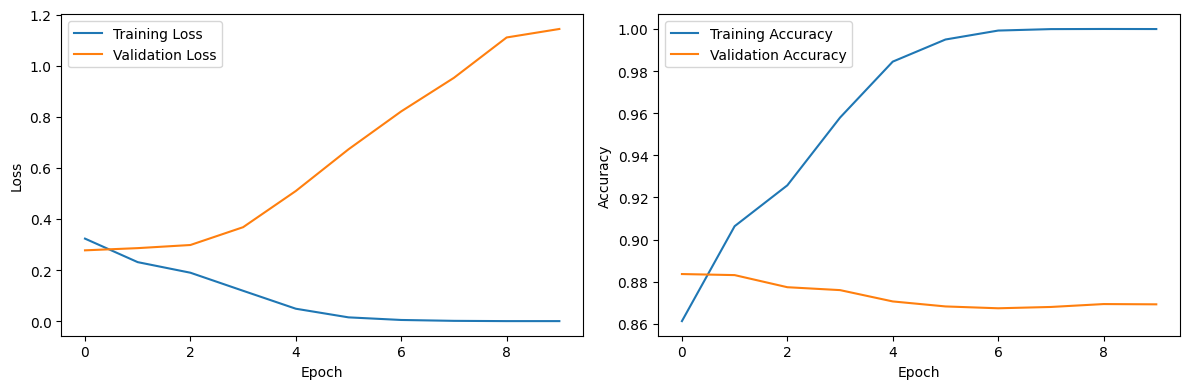

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt


model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(5000,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


history = model.fit(X_train_features, y_train, epochs=10, batch_size=32, validation_split=0.2)


# Get training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot the training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()




**Model evaluation (10 minutes):**

Evaluate the trained model on the testing dataset.
Calculate performance metrics such as accuracy, precision, recall, and F1-score.
Discuss potential improvements or limitations of the model.


In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred_prob = model.predict(X_test_features)
y_pred = (y_pred_prob > 0.5).astype(int)


# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred)
# recall = recall_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred)

precision = precision_score(y_test, y_pred, zero_division=1)
recall = recall_score(y_test, y_pred, zero_division=1)
f1 = f1_score(y_test, y_pred, zero_division=1)



print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)





313/313 [==============================] - 2s 5ms/step
Accuracy: 0.4961
Precision: 1.0
Recall: 0.0
F1-Score: 0.0



**Wrap-up and reflection (10 minutes):**

Summarise the project and its results.
Discuss the practical applications of sentiment analysis and other possible use cases for ANNs with text data.